In [30]:
print("hello")

hello


In [23]:
import tensorflow as tf
print("world")

world


In [24]:
print("hello")

hello


In [28]:
import tensorflow as tf
print("world")

world


In [32]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models

In [34]:
IMAGE_SIZE=256
BATCH_SIZE=32
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\RINNY\Downloads\archive\PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 2152 files belonging to 3 classes.


In [62]:
class_names=dataset.class_names
CHANNELS=3

In [38]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 2 0 1 0 0 1]


In [40]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

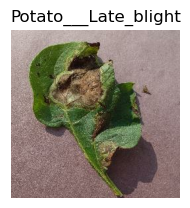

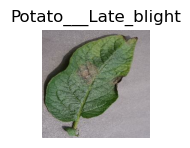

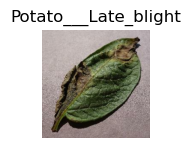

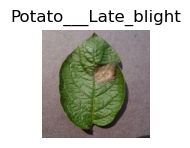

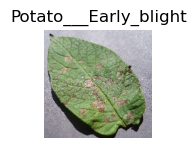

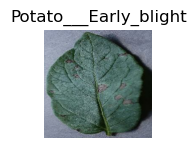

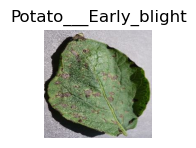

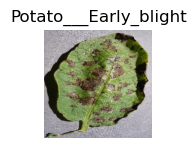

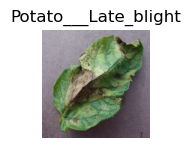

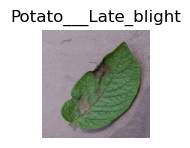

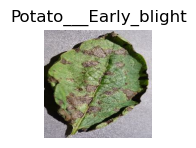

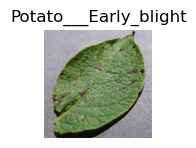

In [42]:
plt.figure(figsize=(10,10))
%matplotlib inline
for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")
    plt.show()

In [44]:
train_size=0.8
len(dataset)

68

In [46]:
train_ds=dataset.take(54)
test_ds=dataset.skip(54)
len(train_ds)
len(test_ds)

14

In [48]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [50]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [52]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 60, 60, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 859,427 (3.28 MB)

 Trainable params: 859,427 (3.28 MB)

 Non-trainable params: 0 (0.00 B)

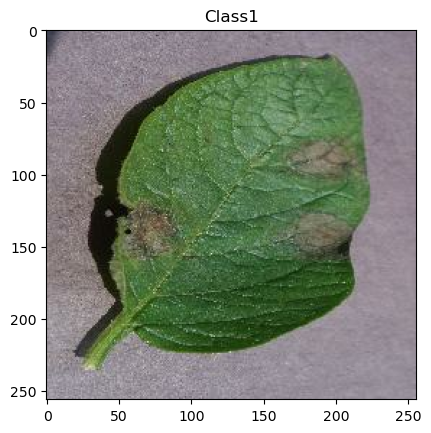

<class 'keras.src.models.sequential.Sequential'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
Prediction label is: Class2


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

# Define constants
n_classes = 3
CHANNELS = 3
IMAGE_SIZE = 256
BATCH_SIZE = 32
class_names = ['Class0', 'Class1', 'Class2']

# Define the input shape for the first layer (excluding batch size)
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Preprocessing layer definition
resize_and_rescale = models.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomZoom(0.3)
])

# Build the model
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),  # Define input shape here
    resize_and_rescale,  # Preprocessing layer

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

# Print the model summary to verify
model.summary()

# Assuming test_ds is your test dataset
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy()

    # Display the first image
    plt.imshow(first_image)
    plt.title(class_names[first_label])
    plt.show()

    # Debugging print
    print(type(model))  # Check if model is still the correct object type

    # Make predictions for the entire batch
    batch_prediction = model.predict(images_batch)

    # Display the predicted label for the first image
    print("Prediction label is:", class_names[np.argmax(batch_prediction[0])])


In [80]:
import os
model_version = 1
save_dir = r"C:\Users\RINNY\Downloads\archive\models"

# Create the directory if it does not exist
os.makedirs(save_dir, exist_ok=True)

# Save the model using the .keras extension
model.save(f"{save_dir}\\{model_version}.keras")